# CNN 練習


In [1]:
# Check GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# import package
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os

## Cifar10 資料讀入及前處理

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

137191424/170498071 [=======================>......] - ETA: 10s

170500096/170498071 [==============================] - 50s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# image preprocessing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255  # rescaling 
x_test /= 255  # rescaling

In [5]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train shape:', y_train.shape)

y_train shape: (50000, 10)


In [0]:
## result's dictionary
model_result = dict()
model_result['acc'] = dict()
model_result['loss'] = dict()
model_result['val_acc'] = dict()
model_result['val_loss'] = dict()

## 模型定義

In [22]:
#@title CNN or DNN ? { vertical-output: true }
cnn = True #@param {type:"boolean"}
# define model structure.

if cnn:
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

else:
  model = Sequential()
  model.add(Flatten(input_shape=x_train.shape[1:]))
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(Dense(128))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
__________

In [0]:
# initiate optimizer
opt = keras.optimizers.adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## 開始訓練模型

In [24]:
#@title Hyperparameter Setting { run: "auto", vertical-output: true }
batch_size = 32 #@param {type:"integer"}
epochs = 15 #@param {type:"integer"}

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
43936/50000 [=========================>....] - ETA: 6s - loss: 1.3891 - acc: 0.5098

50000/50000 [==============================] - 59s 1ms/step - loss: 1.3513 - acc: 0.5223 - val_loss: 1.2750 - val_acc: 0.5625
Epoch 2/15
26592/50000 [==============>...............] - ETA: 25s - loss: 0.9612 - acc: 0.6617

50000/50000 [==============================] - 57s 1ms/step - loss: 0.9275 - acc: 0.6733 - val_loss: 0.8919 - val_acc: 0.6877
Epoch 3/15
19808/50000 [==========>...................] - ETA: 32s - loss: 0.7954 - acc: 0.7186

50000/50000 [==============================] - 57s 1ms/step - loss: 0.7840 - acc: 0.7239 - val_loss: 0.7699 - val_acc: 0.7300
Epoch 4/15
17120/50000 [=========>....................] - ETA: 35s - loss: 0.7011 - acc: 0.7539

50000/50000 [==============================] - 57s 1ms/step - loss: 0.7031 - acc: 0.7521 - val_loss: 0.8157 - val_acc: 0.7118
Epoch 5/15
16160/50000 [========>.....................] - ETA: 36s - loss: 0.6271 - acc: 0.7778

50000/50000 [==============================] - 57s 1ms/step - loss: 0.6348 - acc: 0.7766 - val_loss: 0.9967 - val_acc: 0.6782
Epoch 6/15
15840/50000 [========>.....................] - ETA: 36s - loss: 0.5648 - acc: 0.8028

50000/50000 [==============================] - 57s 1ms/step - loss: 0.5756 - acc: 0.7985 - val_loss: 0.6230 - val_acc: 0.7886
Epoch 7/15
15904/50000 [========>.....................] - ETA: 37s - loss: 0.5137 - acc: 0.8199

50000/50000 [==============================] - 57s 1ms/step - loss: 0.5273 - acc: 0.8159 - val_loss: 0.5954 - val_acc: 0.7979
Epoch 8/15
15712/50000 [========>.....................] - ETA: 37s - loss: 0.4718 - acc: 0.8350

50000/50000 [==============================] - 57s 1ms/step - loss: 0.4857 - acc: 0.8311 - val_loss: 0.6035 - val_acc: 0.7953
Epoch 9/15
15712/50000 [========>.....................] - ETA: 37s - loss: 0.4249 - acc: 0.8530

50000/50000 [==============================] - 57s 1ms/step - loss: 0.4502 - acc: 0.8429 - val_loss: 0.5712 - val_acc: 0.8037
Epoch 10/15
15520/50000 [========>.....................] - ETA: 36s - loss: 0.3952 - acc: 0.8621

50000/50000 [==============================] - 57s 1ms/step - loss: 0.4170 - acc: 0.8541 - val_loss: 0.5969 - val_acc: 0.8032
Epoch 11/15
15648/50000 [========>.....................] - ETA: 37s - loss: 0.3693 - acc: 0.8699

50000/50000 [==============================] - 57s 1ms/step - loss: 0.3917 - acc: 0.8630 - val_loss: 0.5294 - val_acc: 0.8218
Epoch 12/15
15520/50000 [========>.....................] - ETA: 37s - loss: 0.3462 - acc: 0.8772

50000/50000 [==============================] - 57s 1ms/step - loss: 0.3667 - acc: 0.8718 - val_loss: 0.5407 - val_acc: 0.8232
Epoch 13/15
15712/50000 [========>.....................] - ETA: 37s - loss: 0.3208 - acc: 0.8899

50000/50000 [==============================] - 57s 1ms/step - loss: 0.3417 - acc: 0.8791 - val_loss: 0.5463 - val_acc: 0.8182
Epoch 14/15
15712/50000 [========>.....................] - ETA: 36s - loss: 0.3025 - acc: 0.8950

50000/50000 [==============================] - 57s 1ms/step - loss: 0.3211 - acc: 0.8874 - val_loss: 0.5212 - val_acc: 0.8286
Epoch 15/15
15712/50000 [========>.....................] - ETA: 36s - loss: 0.2872 - acc: 0.8988

50000/50000 [==============================] - 57s 1ms/step - loss: 0.3025 - acc: 0.8924 - val_loss: 0.5272 - val_acc: 0.8281


## 訓練結果視覺化

In [0]:
#@title Save Learning Result { vertical-output: true }
experiment = "CNN" #@param {type:"string"}

model_result['acc'][experiment] = model.model.history.history.get('acc')
model_result['val_acc'][experiment] = model.model.history.history.get('val_acc')
model_result['loss'][experiment] = model.model.history.history.get('loss')
model_result['val_loss'][experiment] = model.model.history.history.get('val_loss')

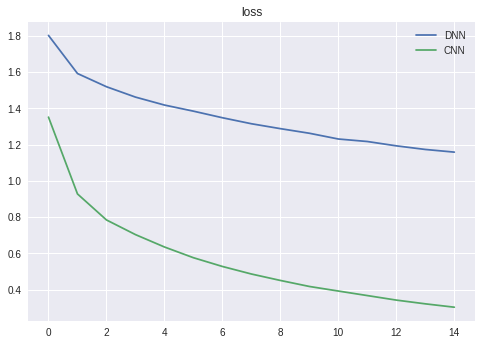

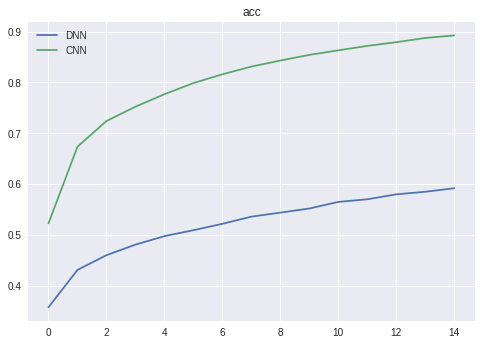

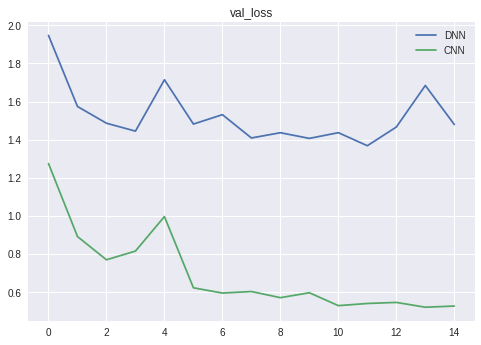

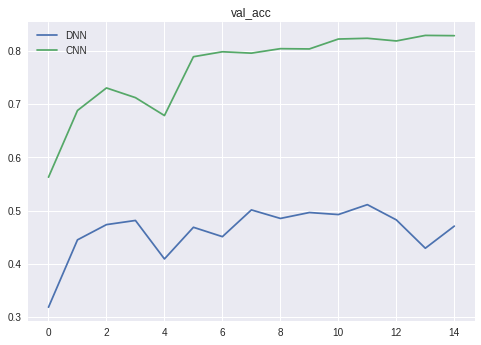

In [26]:
#@title Model Result { vertical-output: true }
import matplotlib.pyplot as plt

# training loss
for i in model_result['loss'].keys():
  plt.plot(np.arange(len(model_result['loss'][i])), model_result['loss'][i], label = i)

plt.legend(loc='best')
plt.title('loss')
plt.show()

# training acc
for i in model_result['acc'].keys():
  plt.plot(np.arange(len(model_result['acc'][i])), model_result['acc'][i], label = i)

plt.legend(loc='best')
plt.title('acc')
plt.show()

# valid loss
for i in model_result['val_loss'].keys():
  plt.plot(np.arange(len(model_result['val_loss'][i])), model_result['val_loss'][i], label = i)

plt.legend(loc='best')
plt.title('val_loss')
plt.show()


# valid acc
for i in model_result['val_acc'].keys():
  plt.plot(np.arange(len(model_result['val_acc'][i])), model_result['val_acc'][i], label = i)

plt.legend(loc='best')
plt.title('val_acc')
plt.show()